# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cm import get_cmap

from pandas_profiling import ProfileReport

plt.style.use("ggplot")

## Lendo os dados


In [2]:
data = pd.read_csv("data/faturamento_lojas_atuais.csv")

data.head(10)

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30
5,1,2016,6,CATEG_01,108.0,4741.36
6,1,2016,7,CATEG_01,111.0,5604.77
7,1,2016,8,CATEG_01,86.0,3987.35
8,1,2016,9,CATEG_01,148.0,5543.12
9,1,2016,10,CATEG_01,147.0,4996.06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


Para o começo, vamos fazer um profilling.

In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [5]:
profile.to_file("report-fla-1.html")

## Analise dos dados

### Receita / Qtde

Para começar a analise dos dados vamos criar mais um atributo, ele vai verificar a "Receita / Quantidade", vai ajudar a verificar a relação entre ambos os atributos.

In [4]:
data["rec_un"] = data["receita"] / data["qtde"]

data.head(10)

,cod_loja,ano,mes,categoria,qtde,receita,rec_un
0,1,2016,1,CATEG_01,301.0,9164.86,30.448040
1,1,2016,2,CATEG_01,187.0,8175.55,43.719519
2,1,2016,3,CATEG_01,242.0,10521.67,43.477975
3,1,2016,4,CATEG_01,104.0,4560.91,43.854904
4,1,2016,5,CATEG_01,100.0,4263.30,42.633000
5,1,2016,6,CATEG_01,108.0,4741.36,43.901481
6,1,2016,7,CATEG_01,111.0,5604.77,50.493423
7,1,2016,8,CATEG_01,86.0,3987.35,46.364535
8,1,2016,9,CATEG_01,148.0,5543.12,37.453514
9,1,2016,10,CATEG_01,147.0,4996.06,33.986803


Vamos agrupar as categorias e fazer analises a partir delas.

In [5]:
data_categorias = data.groupby(["categoria"])

Vamos verificar a receita unitaria por categoria.

In [6]:
receita_unitaria_categoria = [[], []]

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.rec_un.sum())
    print(receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1], receita_unitaria_categoria[1][len(receita_unitaria_categoria[1]) - 1])

CATEG_01 2125339.350360004
CATEG_02 1580406.5502526003
CATEG_03 2171944.3767342353
CATEG_04 2746816.951001936
CATEG_05 2959746.9412683113
CATEG_06 3824528.892864199
CATEG_07 1643342.8293523947
CATEG_08 7555989.557089456
CATEG_09 2617596.438245725
CATEG_10 3554679.3732320196
CATEG_11 6739007.523648005
CATEG_12 1277777.5788737908
CATEG_13 2959447.0946994224
CATEG_14 185576.0801370619
CATEG_15 24446.548333333332
CATEG_16 59.980000000000004


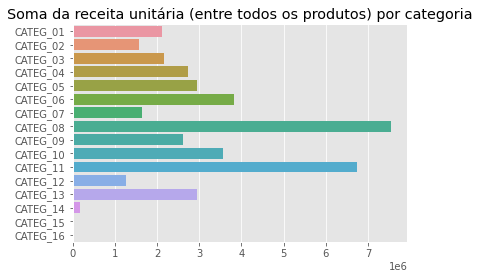

In [8]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[1], orient = "h")
plt.title("Soma da receita unitária (entre todos os produtos) por categoria")
plt.show()

Também podemos ver a média.

In [7]:
receita_unitaria_categoria = [[], []]

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.rec_un.sum() / len(df))
    print(receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1], receita_unitaria_categoria[1][len(receita_unitaria_categoria[1]) - 1])

CATEG_01 28.98321765116602
CATEG_02 29.969403994625864
CATEG_03 29.495286021079558
CATEG_04 37.45114734677596
CATEG_05 40.193201081891296
CATEG_06 52.407318646480384
CATEG_07 22.315596330201853
CATEG_08 102.87115978120728
CATEG_09 35.54633330498411
CATEG_10 48.30318073177453
CATEG_11 91.51410969252713
CATEG_12 17.35238506285958
CATEG_13 41.701735943458544
CATEG_14 2.6537026517147173
CATEG_15 26.118107193732193
CATEG_16 29.990000000000002


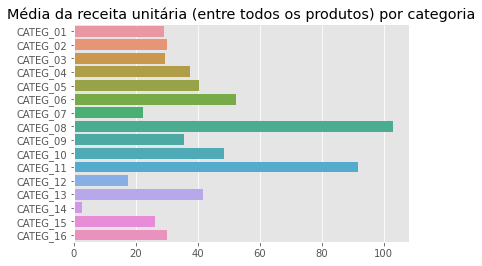

In [8]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[1], orient = "h")
plt.title("Média da receita unitária (entre todos os produtos) por categoria")
plt.show()

texto texto texto

### Lojas com categorias combinadas

Vamos verificar como a receita das lojas de acordo com as diferentes combinações de categorias.

In [9]:
data_lojas = data.groupby(["cod_loja"])

In [10]:
receita_lojas_cats = {}

for (loja, df) in data_lojas:
    # Verifica as diferentes categorias que aquela loja possui
    categorias = list(df.categoria.unique())
    identificador = "/".join(categorias)

    # Guarda a combinação de categorias
    if identificador in receita_lojas_cats:
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())
    else:
        receita_lojas_cats[identificador] = {
            "lojas": [],
            "receita": [],
            "rec_un": []
        }
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())

In [11]:
i = 0
for label in receita_lojas_cats:
    print(i, label, "\n")
    i = i + 1

0 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

1 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

2 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15/CATEG_16 

3 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

4 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

5 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13 

6 CATEG_03/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

7 CATEG_01/CATEG_04/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

8 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CAT

Vamos mostrar alguns gráficos.

In [12]:
receita_cats = [[], [], []]

i = 0
for label in receita_lojas_cats:
    receita_cats[0].append(i)
    receita_cats[1].append(np.mean(receita_lojas_cats[label]["rec_un"]))
    receita_cats[2].append(len(receita_lojas_cats[label]["lojas"]))

    i = i + 1

In [13]:
receita_cats

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [13413.788673544781,
  13757.307109139885,
  14197.255381891446,
  9702.379142078682,
  13375.656735334098,
  680.2752299396939,
  490.15250087077675,
  409.75298786181133,
  571.1965627196722],
 [2479, 605, 1, 37, 1, 4, 1, 1, 1]]

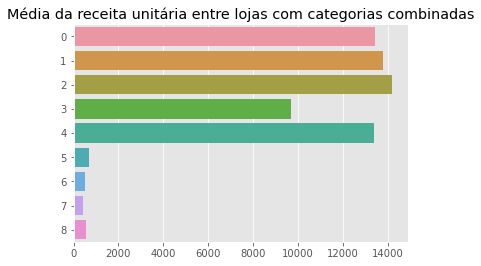

In [14]:
sns.barplot(y = receita_cats[0], x = receita_cats[1], orient = "h")
plt.title("Média da receita unitária entre lojas com categorias combinadas")
plt.show()

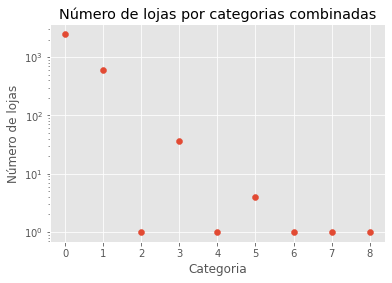

In [15]:
plt.scatter(receita_cats[0], receita_cats[2])

plt.yscale("log")

plt.xlabel("Categoria")
plt.ylabel("Número de lojas")
plt.title("Número de lojas por categorias combinadas")

plt.show()

### Lidando com a data

Podemos deixar os dois atributos `mes, ano` em apenas um para facilitarm a visualização dos dados em diferentes períodos.

In [16]:
data["periodo"] = data["ano"].astype(str) + "/" + data["mes"].astype(str)

data.head(10)

,cod_loja,ano,mes,categoria,qtde,receita,rec_un,periodo
0,1,2016,1,CATEG_01,301.0,9164.86,30.448040,2016/1
1,1,2016,2,CATEG_01,187.0,8175.55,43.719519,2016/2
2,1,2016,3,CATEG_01,242.0,10521.67,43.477975,2016/3
3,1,2016,4,CATEG_01,104.0,4560.91,43.854904,2016/4
4,1,2016,5,CATEG_01,100.0,4263.30,42.633000,2016/5
5,1,2016,6,CATEG_01,108.0,4741.36,43.901481,2016/6
6,1,2016,7,CATEG_01,111.0,5604.77,50.493423,2016/7
7,1,2016,8,CATEG_01,86.0,3987.35,46.364535,2016/8
8,1,2016,9,CATEG_01,148.0,5543.12,37.453514,2016/9
9,1,2016,10,CATEG_01,147.0,4996.06,33.986803,2016/10


In [17]:
data_periodo = data.groupby(["periodo"])

Agora que temos os dados por periodo, podemos ter construir gráficos e analisar a variação da receita durante diferentes períodos.

In [18]:
# Peridoo, Soma da receita, Soma unitária, Quantidade de produtos registrado no período
receita_periodo = [[], [], [], []]

for (periodo, df) in data_periodo:
    receita_periodo[0].append(periodo)
    receita_periodo[1].append(df.receita.sum())
    receita_periodo[2].append(df.rec_un.sum())
    receita_periodo[3].append(len(df))

In [19]:
receita_periodo

[['2016/1',
  '2016/10',
  '2016/11',
  '2016/12',
  '2016/2',
  '2016/3',
  '2016/4',
  '2016/5',
  '2016/6',
  '2016/7',
  '2016/8',
  '2016/9',
  '2017/1',
  '2017/10',
  '2017/11',
  '2017/12',
  '2017/2',
  '2017/3',
  '2017/4',
  '2017/5',
  '2017/6',
  '2017/7',
  '2017/8',
  '2017/9'],
 [364784885.18,
  342437947.8599999,
  398008640.85999995,
  798514916.3100001,
  258856554.21999997,
  308149053.94,
  316512361.31999993,
  455139463.60999995,
  381751283.27,
  316441839.51,
  379963075.99999994,
  314348342.2099999,
  320239402.79999995,
  327269302.14,
  436271894.93,
  785249286.85,
  271138378.7,
  329741026.83,
  317465906.17999995,
  484526962.46000004,
  407682016.53,
  312799418.05,
  402550481.5399999,
  333495140.21999997],
 [1339097.5880516798,
  1609737.2162019894,
  1728218.7722152425,
  1881801.746657863,
  1444428.8973037272,
  1591176.7372103666,
  1659021.5973224633,
  1653743.779890729,
  1712765.3875256574,
  1796971.9278093053,
  1840536.9691196603,
  17130

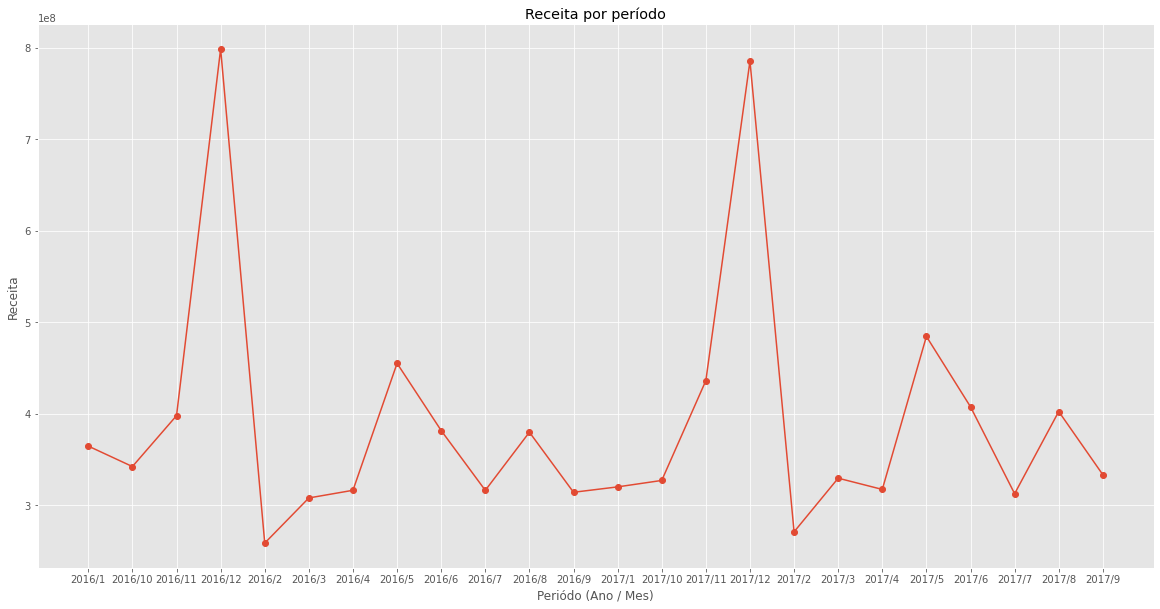

In [20]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[1], marker = 'o')

plt.title("Receita por período")
plt.xlabel("Periódo (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

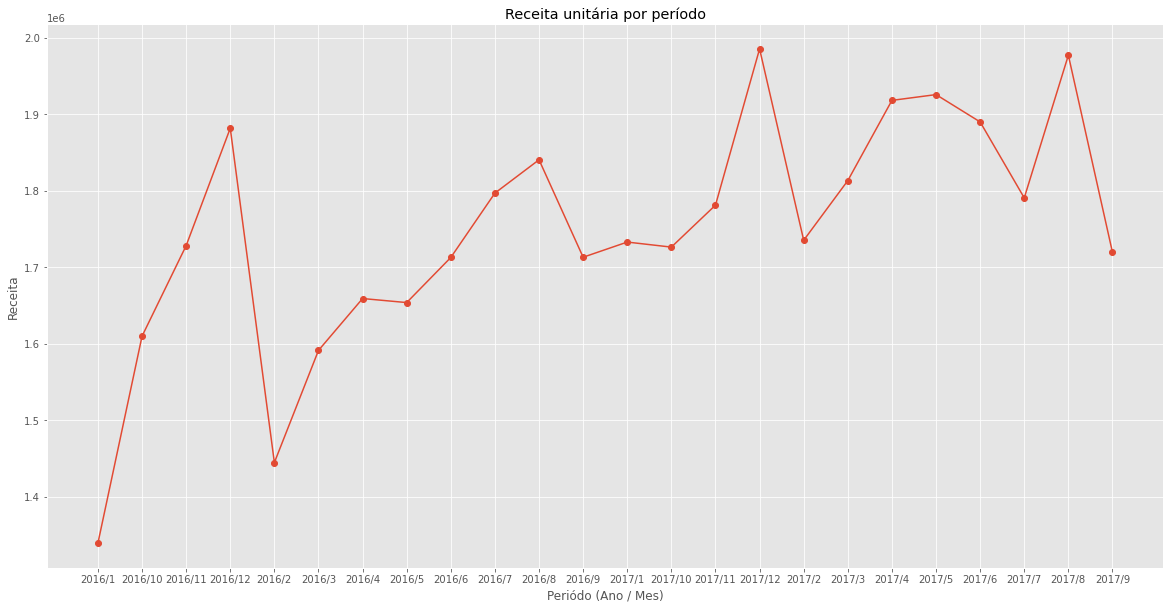

In [21]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[2], marker = 'o')

plt.title("Receita unitária por período")
plt.xlabel("Periódo (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

Outros gráficos que podem ser criados é a receita entre as diferentes categorias.

In [54]:
# Categoria = {Periodo, Receita, ReceitaUnitaria}
receita_cats_periodo = {}

for (periodo, df) in data_periodo:
    categorias_faltando_no_periodo = list(data.categoria.unique())

    for (cat, df_cat) in df.groupby(["categoria"]):
        categorias_faltando_no_periodo.remove(cat)

        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": []
            }
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
    
    # Garante que as categorias que não venderam no periodo terão o valor 0 no seu conjunto de dados
    for cat in categorias_faltando_no_periodo:
        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": []
            }
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)


In [55]:
print(receita_cats_periodo)

{'CATEG_01': {'receita': [2626267.29, 2562843.06, 2298175.88, 3759012.9699999997, 2674323.74, 3237772.21, 3068946.5700000003, 3040889.46, 2812320.7399999998, 2511138.76, 2026337.4699999997, 2131467.83, 2275933.02, 3402691.52, 3463069.02, 5308245.48, 1522227.46, 2213415.0, 1921425.75, 2872587.84, 2374250.38, 3547997.9400000004, 4129462.0100000002, 3678736.35], 'rec_un': [75492.37044772173, 91587.98247816422, 88902.06847606543, 88813.78523137617, 91422.04335461635, 92239.71965683988, 89290.85212402491, 87659.02094622806, 92295.92319931972, 92455.7943784242, 91915.44013998972, 92671.3193054189, 81735.39752522265, 89353.36194977416, 84556.1169925975, 91499.97867002936, 88766.61038374291, 93608.37442555562, 92378.35357217633, 90505.02136763156, 84383.33241890234, 70582.43965270341, 91308.25657508199, 91915.78708839712], 'periodo': ['2016/1', '2016/10', '2016/11', '2016/12', '2016/2', '2016/3', '2016/4', '2016/5', '2016/6', '2016/7', '2016/8', '2016/9', '2017/1', '2017/10', '2017/11', '2017/

In [23]:
#receita_cats = [[], [], []]

#for label in receita_cats_periodo:
#    receita_cats[0].append(label)
#    receita_cats[1].append(np.sum(receita_cats_periodo[label]["receita"]))
#    receita_cats[2].append(np.mean(receita_cats_periodo[label]["rec_un"]))
#


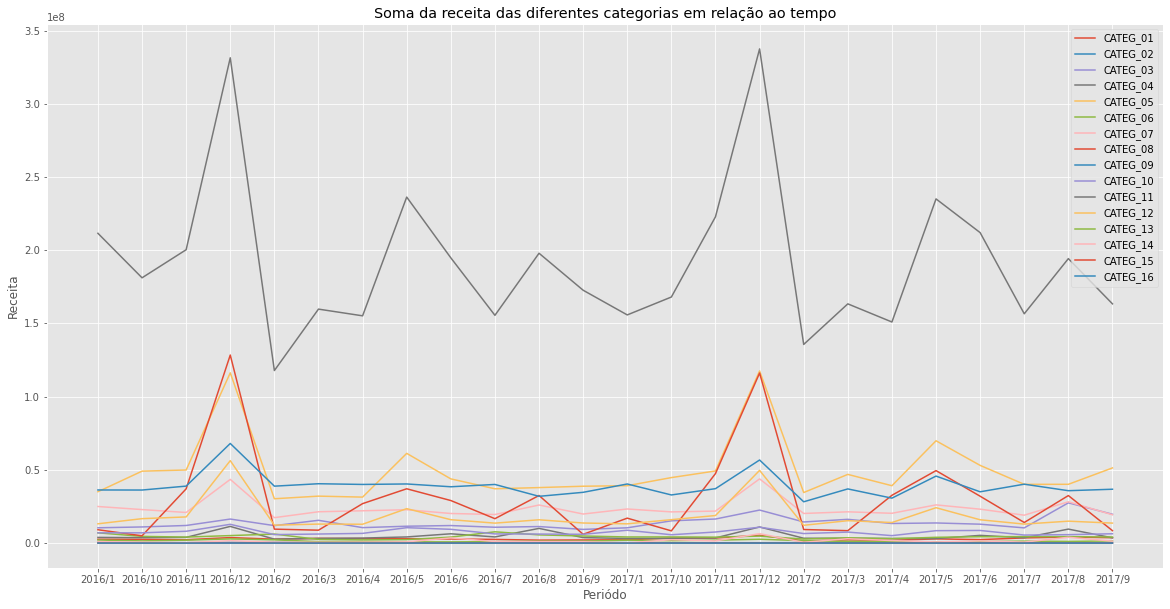

In [56]:
plt.figure(figsize = (20, 10))

for cat in receita_cats_periodo:
    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["receita"], label = cat)

plt.legend()
plt.title("Soma da receita das diferentes categorias em relação ao tempo")
plt.xlabel("Periódo")
plt.ylabel("Receita")

plt.show()

Podemos ver pelo gráfico acima que a `CATEG_11` é predominante durante todo o tempo e é difiícil visualizar os dados dessa forma, então vamos ver a receita de cada categoria de forma separada.

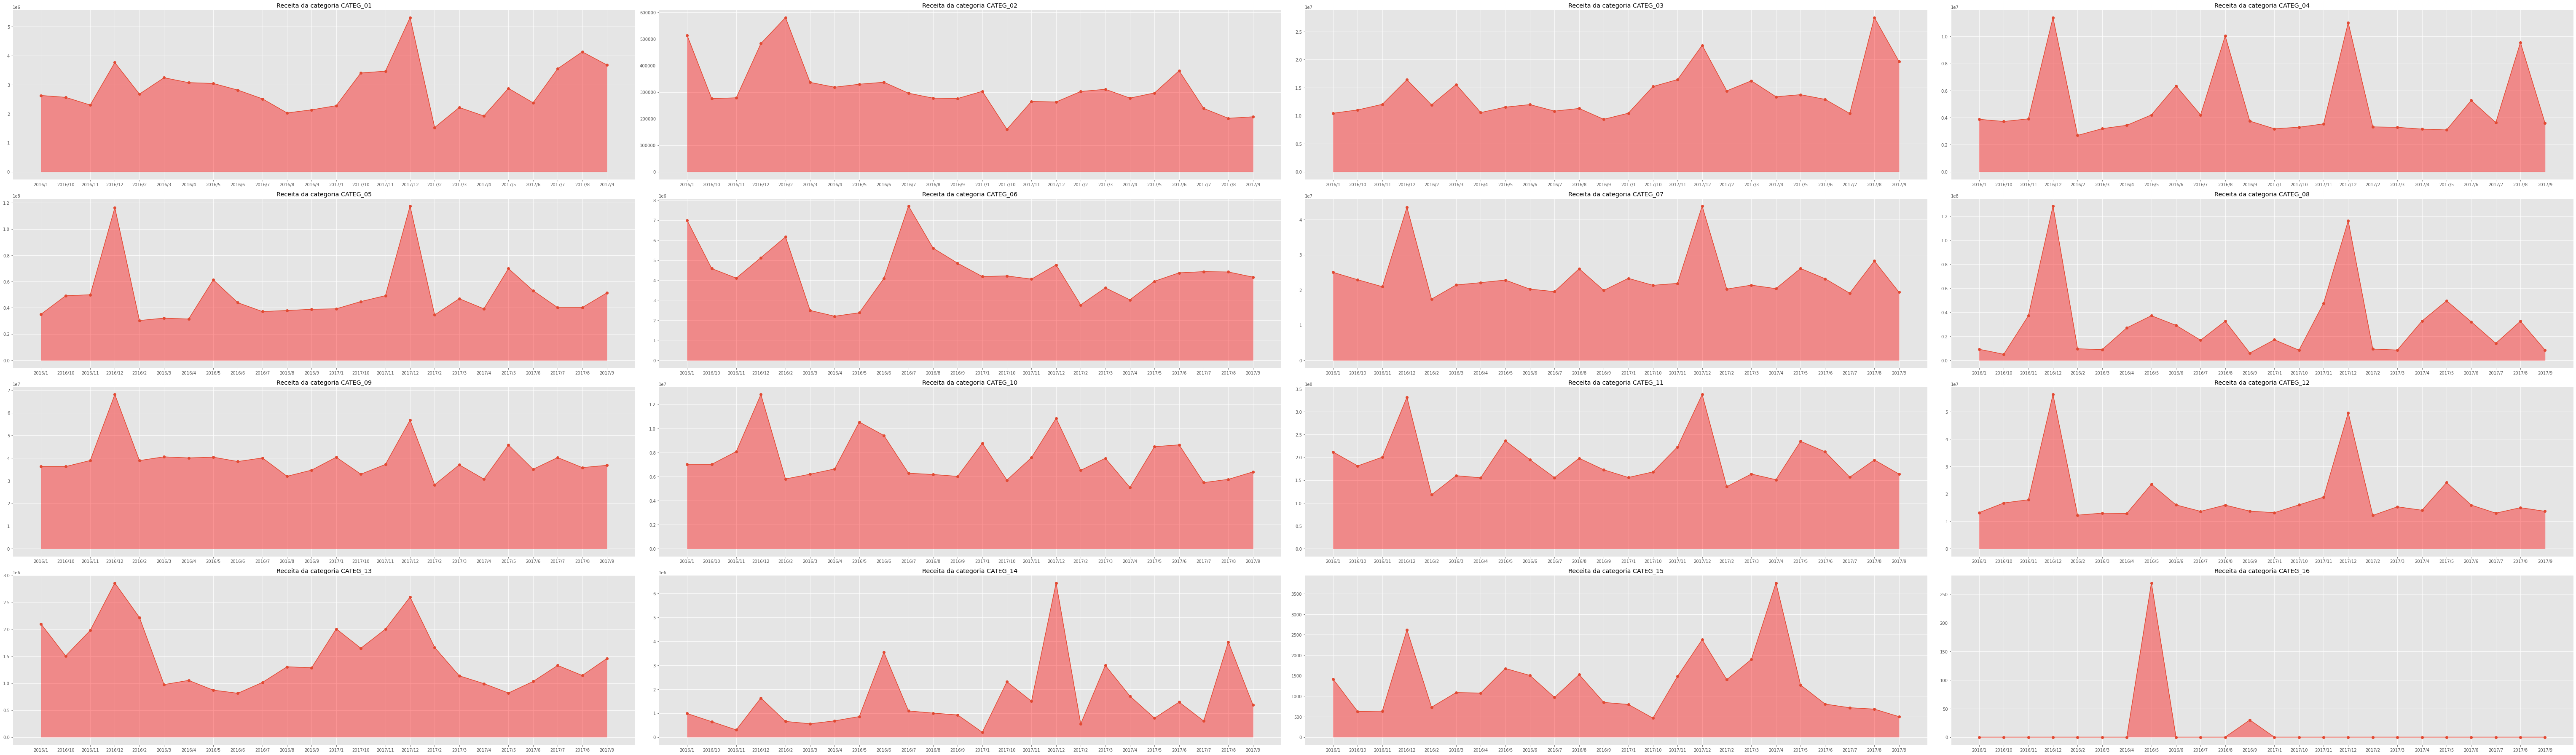

In [57]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["receita"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["receita"], color = "red", alpha = 0.4)
    plt.title("Receita da categoria {}".format(cat))

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

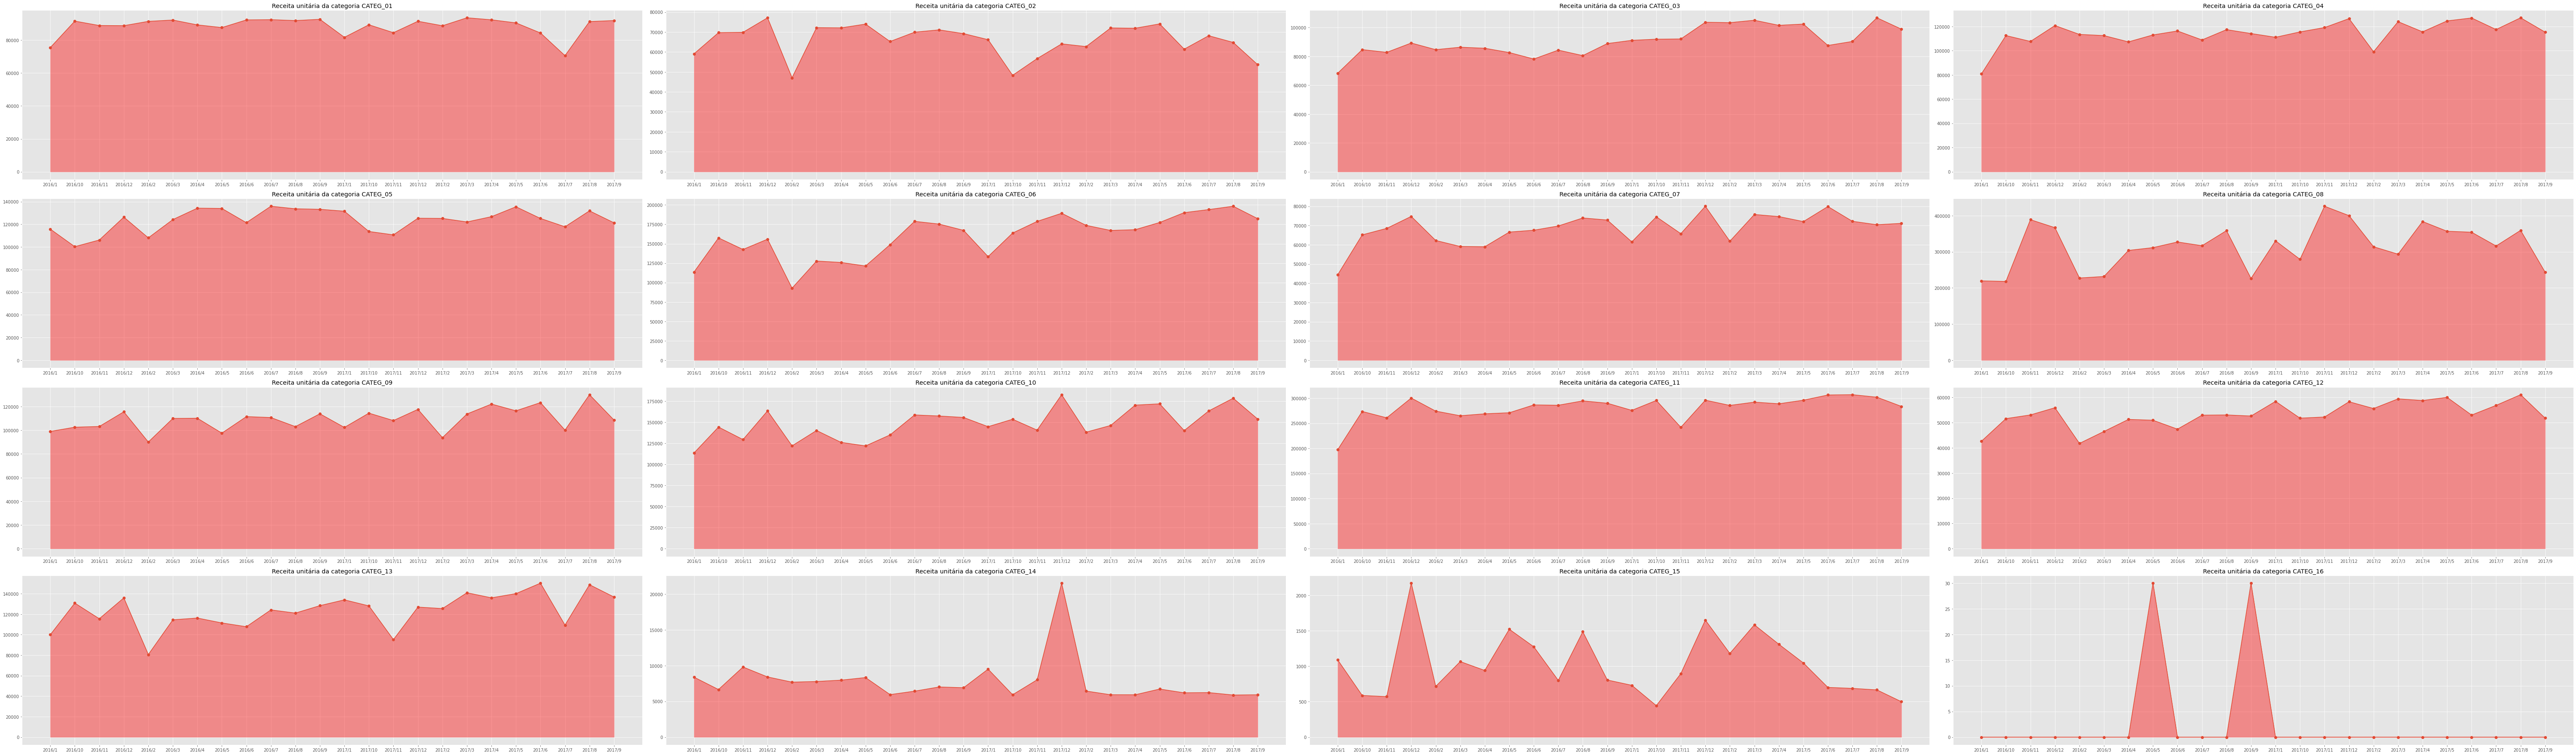

In [58]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], color = "red", alpha = 0.4)
    plt.title("Receita unitária da categoria {}".format(cat))

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()